In [ ]:
%matplotlib inline
!pip install geopandas
import pandas as pd
import geopandas

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[01-introduction-geospatial-data](https://colab.research.google.com/drive/1H4mcEeu7HMcO9o8VtfLffi0TMOlb_kch)


[02-coordinate-reference-systems](https://colab.research.google.com/drive/1O7hx9LmS971oqR6N9Ff2SwBs0E479-o4#scrollTo=GVJTHULeQX_l)

[03-spatial-relationships-operations](https://colab.research.google.com/drive/1Nfpuf9Ek5ySt4Yz1ViVErcy0xCRpyv4u#scrollTo=XUM6ob0AcfqW)

In [3]:
countries = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/data/ne_110m_admin_0_countries.zip")
cities = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/data/ne_110m_populated_places.zip")
rivers = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/data/ne_50m_rivers_lake_centerlines.zip")

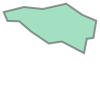

In [4]:
belgium = countries.loc[countries['name'] == 'Belgium', 'geometry'].squeeze() #.squeeze() estrae la geometria
belgium

In [5]:
paris = cities.loc[cities['name'] == 'Paris', 'geometry'].squeeze()
brussels = cities.loc[cities['name'] == 'Brussels', 'geometry'].squeeze()

In [6]:
from shapely.geometry import LineString 
line = LineString([paris, brussels])

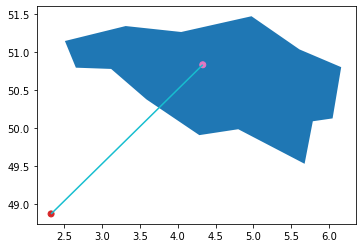

In [7]:
geopandas.GeoSeries([belgium, paris, brussels, line]).plot(cmap='tab10')

.within()

In [8]:
brussels.within(belgium) #controlla se brussels è dentro belgium

True

In [9]:
paris.within(belgium)

False

.contains()

In [10]:
belgium.contains(brussels)

True

In [11]:
belgium.contains(paris)

False

In [12]:
line.intersects(belgium) #la linea fatta prima passa per il belgio

True

In [13]:
belgium.contains(line) #risulta falso perchè la linea non è contenuta interamente 

False

In [14]:
countries[countries.contains(paris)] #ci permette di capire in che nazione è paris

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
55,FRA,France,Europe,67106161.0,2699000.0,"MULTIPOLYGON (((2.51357 51.14851, 2.65842 50.7..."


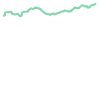

In [15]:
amazon = rivers[rivers['name'] == 'Amazonas'].geometry.squeeze() #ci fa vedere la geometria del fiume Amazonas
amazon

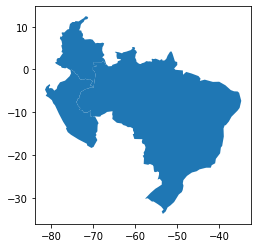

In [16]:
countries[countries.crosses(amazon)].plot()  # or .intersects
                                             # visualizziamo le nazioni in cui passa il fiume 

In [17]:
districts = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/data/paris_districts.geojson").to_crs(epsg=2154)
stations = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/data/paris_bike_stations.geojson").to_crs(epsg=2154)


In [18]:
districts

,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((651908.563 6861756.318, 651908.510 6..."
1,2,Halles,8984,"POLYGON ((652264.717 6862479.030, 652178.752 6..."
2,3,Palais-Royal,3195,"POLYGON ((651539.853 6862658.479, 651514.121 6..."
3,4,Place-Vendôme,3044,"POLYGON ((650990.707 6862971.961, 650946.460 6..."
4,5,Gaillon,1345,"POLYGON ((651314.531 6863309.339, 651280.525 6..."
...,...,...,...,...
75,76,Combat,38988,"POLYGON ((655141.552 6864679.034, 655225.818 6..."
76,77,Belleville,35773,"POLYGON ((654754.612 6863184.275, 654747.942 6..."
77,78,Saint-Fargeau,42087,"POLYGON ((657001.413 6863580.002, 657002.434 6..."
78,79,Père-Lachaise,42332,"POLYGON ((655635.731 6862021.084, 655568.000 6..."


In [19]:
# Import the Point geometry
from shapely.geometry import Point

Create a Shapely point object with the coordinates of the Eiffel Tower and assign it to a variable called eiffel_tower. Print the resul

In [ ]:
# %load _solved/solutions/03-spatial-relationships-operations1.py
eiffel_tower = Point( 648237.3,6862271.9)
eiffel_tower

Check if the Eiffel Tower is located within the Montparnasse district (provided).

In [21]:
Montparnasse = districts.loc[districts['district_name'] == 'Montparnasse', 'geometry'].squeeze()
Montparnasse.contains(eiffel_tower) #controlla se la torre Eifel è nel distretto di Montparnasse

False

In [22]:
districts[districts.contains(eiffel_tower)]   #controlla quale distretto contiene la torre Eiffel

,id,district_name,population,geometry
27,28,Gros-Caillou,25156,"POLYGON ((649336.752 6861767.761, 649110.815 6..."


In [23]:
districts.crs

<Projected CRS: EPSG:2154>
Name: RGF93 / Lambert-93
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: France - onshore and offshore, mainland and Corsica.
- bounds: (-9.86, 41.15, 10.38, 51.56)
Coordinate Operation:
- name: Lambert-93
- method: Lambert Conic Conformal (2SP)
Datum: Reseau Geodesique Francais 1993
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
!pip install contextily   # installo contextily
import contextily as ctx  #lo importo

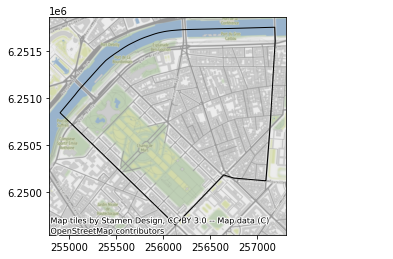

In [25]:
ax = districts[districts.contains(eiffel_tower)].to_crs(epsg=3857).plot(facecolor='None',edgecolor='k') #facecolor serve a cambiare il colore del poligono
ctx.add_basemap(ax) #ricordarsi di usare lo stesso epsg con contextily,convertire quello del geoDataFrame usando il metodo to_crs(epsg=3857)

In [26]:
# Accessing the Montparnasse geometry (Polygon)
district_montparnasse = districts.loc[52, 'geometry']
bike_station = stations.loc[293, 'geometry']

<div class="alert alert-success">

**EXERCISE: How far is the closest bike station?**

Now, we might be interested in the bike stations nearby the Eiffel Tower. To explore them, let's visualize the Eiffel Tower itself as well as the bikes stations within 1km.

To do this, we can calculate the distance to the Eiffel Tower for each of the stations. Based on this result, we can then create a mask that takes `True` if the station is within 1km, and `False` otherwise, and use it to filter the stations GeoDataFrame. Finally, we make a visualization of this subset.

* Calculate the distance to the Eiffel Tower for each station, and call the result `dist_eiffel`.
* Print the distance to the closest station (which is the minimum of `dist_eiffel`).
* Select the rows the `stations` GeoDataFrame where the distance to the Eiffel Tower is less than 1 km (note that the distance is in meters). Call the result `stations_eiffel`.

<details><summary>Hints</summary>

* The `distance()` method of a GeoDataFrame works element-wise: it calculates the distance between each geometry in the GeoDataFrame and the geometry passed to the method.
* A Series has a `min()` method to calculate the minimum value.
* To create a boolean mask based on a condition, we can do e.g. `s < 100`.

</details>

</div>

In [30]:
#mask cioè una serie
dist_eiffel = stations.distance(eiffel_tower)


In [28]:
dist_eiffel = stations.distance(eiffel_tower) 
stations[stations.distance(eiffel_tower) <= dist_eiffel.min()] 

,name,bike_stands,available_bikes,geometry
1154,07025 - SUFFREN TOUR EIFFEL,33,32,POINT (648138.476 6862061.617)


In [31]:
stations_eiffel = stations[stations.distance(eiffel_tower) <= 1000]  
stations_eiffel

,name,bike_stands,available_bikes,geometry
263,15024 - LAOS,22,5,POINT (648728.356 6861434.945)
286,15028 - DUPLEIX,69,24,POINT (648038.777 6861494.699)
313,15025 - AMETTE,48,28,POINT (648392.589 6861497.926)
400,16112 - CHERNOVITZ,36,3,POINT (647331.479 6862122.655)
447,07022 - PONT DE L'ALMA,69,9,POINT (648809.115 6862626.943)
560,07020 - CLER,57,29,POINT (649123.233 6862068.245)
568,08046 - ALMA MARCEAU,30,2,POINT (648665.831 6863023.406)
599,15105 - SUFFREN FÉDÉRATION,24,0,POINT (648479.455 6861643.109)
620,07021 - BOSQUET SAINT DOMINIQUE,50,3,POINT (648913.753 6862293.667)
668,07019 - ECOLE MILITAIRE,47,29,POINT (649039.413 6861881.063)


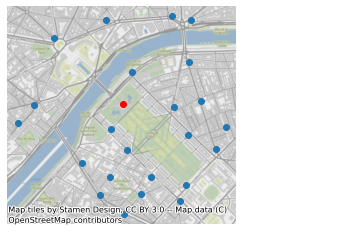

In [32]:
ax = stations_eiffel.to_crs(epsg=3857).plot()
geopandas.GeoSeries([eiffel_tower], crs='EPSG:2154').to_crs(epsg=3857).plot(ax=ax, color='red')
ctx.add_basemap(ax)
ax.set_axis_off()

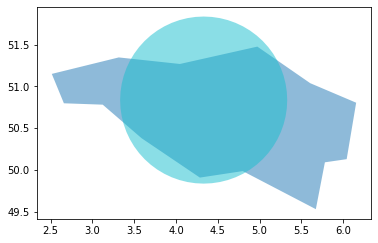

In [34]:
geopandas.GeoSeries([belgium, brussels.buffer(1)]).plot(alpha=0.5, cmap='tab10') #buffer area di memoria nella quale vengono ricaricte informazioni

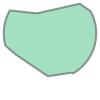

In [35]:
brussels.buffer(1).intersection(belgium) #fa vedere la parte in cui la parte di Bruxell interseca con il Belgio

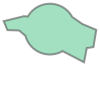

In [36]:
brussels.buffer(1).union(belgium) #unione delle due parti

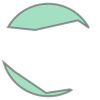

In [37]:
brussels.buffer(1).difference(belgium) #al buffer di brussels toglie la parte del Belgio

unary_union attribute, which converts the set of geometry objects in a GeoDataFrame into a single geometry object by taking the union of all those geometries.

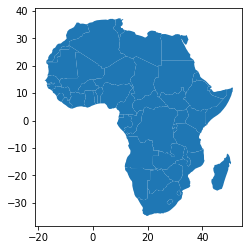

In [38]:
africa_countries = countries[countries['continent'] == 'Africa']
africa_countries.plot()

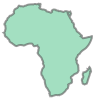

In [39]:
africa = africa_countries.unary_union #unisce tutti i poligoni in un unico poligono
africa

In [40]:
districts = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/data/paris_districts.geojson").to_crs(epsg=2154)

In [41]:
# created a line with http://geojson.io
s_seine = geopandas.GeoDataFrame.from_features({"type":"FeatureCollection","features":[{"type":"Feature","properties":{},"geometry":{"type":"LineString","coordinates":[[2.408924102783203,48.805619828930226],[2.4092674255371094,48.81703747481909],[2.3927879333496094,48.82325391133874],[2.360687255859375,48.84912860497674],[2.338714599609375,48.85827758964043],[2.318115234375,48.8641501307046],[2.298717498779297,48.863246707697],[2.2913360595703125,48.859519915404825],[2.2594070434570312,48.8311646245967],[2.2436141967773438,48.82325391133874],[2.236919403076172,48.82347994904826],[2.227306365966797,48.828339513221444],[2.2224998474121094,48.83862215329593],[2.2254180908203125,48.84856379804802],[2.2240447998046875,48.85409863123821],[2.230224609375,48.867989496547864],[2.260265350341797,48.89192242750887],[2.300262451171875,48.910203080780285]]}}]},
                                               crs={'init': 'epsg:4326'})

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [42]:
s_seine_utm = s_seine.to_crs(epsg=2154)

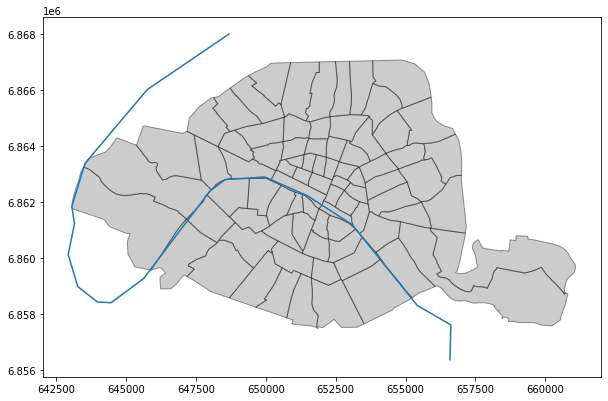

In [44]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
districts.plot(ax=ax, color='grey', alpha=0.4, edgecolor='k')
s_seine_utm.plot(ax=ax)

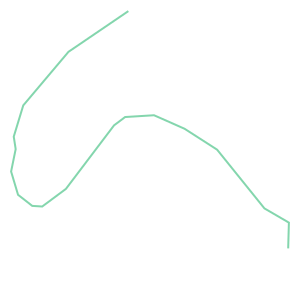

In [45]:
# access the single geometry object
seine = s_seine_utm.geometry.squeeze()
seine

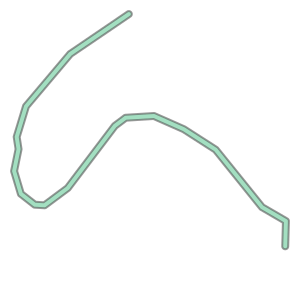

In [46]:
# %load _solved/solutions/03-spatial-relationships-operations11.py
seine_buffer = seine.buffer(150)
seine_buffer

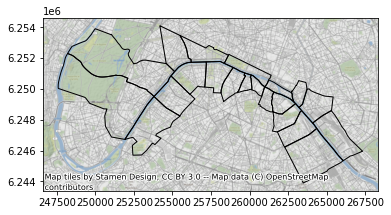

In [47]:
ax = districts[districts.intersects(seine_buffer)].to_crs(epsg=3857).plot(facecolor='none',edgecolor='k')
ctx.add_basemap(ax)